# The purpose of this notebook is to make a comparison between SIMQSO vs QSO. The analysis will use PCA and picca.

To do for this notebook
- Look at the mean continuum from PICCA as SIMQSO and QSO data.
- To compute the random spectra bins.
- Look at the difference between mean spectra for SIMQSO and QSO.
- Look at the standard deviation for SIMQSO and QSO from mean spectra.
- To compute the EMPCA for SIMQSO and QSO data.
- Look at the difference between mean continuum for SIMQSO and QSO.
- Look at the standard deviation rate between SIMQSO and QSO.
- Look at the difference between the first eigenvectors for SIMQSO and QSO.
- Look at the difference between the dispersion of the first coefficients for SIMQSO and QSO.

Import modules

In [1]:
import numpy as np
import scipy as sp
import fitsio
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Analyze PICA results

Let's began by compare the continuums from PICCA

Charge the picca data

In [2]:
data = {}
data['path_base'] = '/global/cscratch1/sd/rodcn25/'
### Boss DR14 data for ly-A continuum
Afdir = data['path_base']+'spectra_tables/develop/correlations/lya/Delta_lya/Log/delta_attributes.fits.gz'
### Mocks data for ly-A continuum
Bfdir = data['path_base']+'doctorado/qso_template/correlations/lya/00/Delta_lya/Log/delta_attributes.fits.gz'
### Boss data for Ly-A continuum
Cfdir = data['path_base']+'paper_alma/bossdr14/lya/Delta_lya/Log/delta_attributes.fits.gz'


Afm = fitsio.read(Afdir,'cont')
Bfm = fitsio.read(Bfdir,'cont')
Cfm = fitsio.read(Cfdir,'cont')

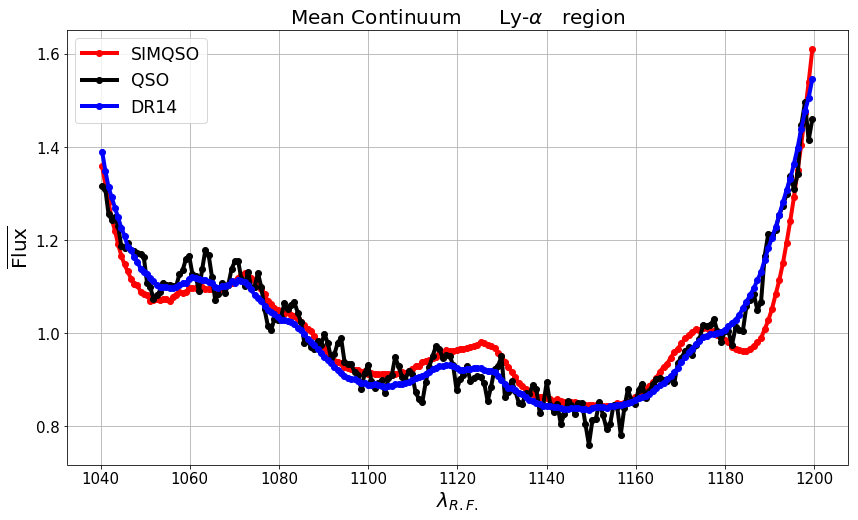

In [3]:
plt.figure(figsize=(14,8))
plt.title(r'Mean Continuum      Ly-$\alpha$   region',fontsize = 20)
plt.plot(10**Afm['loglam_rest'],Afm['mean_cont'],'o-',color='r',linewidth=4,label='SIMQSO')
plt.plot(10**Bfm['loglam_rest'],Bfm['mean_cont'],'o-',color='k',linewidth=4,label='QSO')
plt.plot(10**Cfm['loglam_rest'],Cfm['mean_cont'],'o-',color='b',linewidth=4,label='DR14')
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()
plt.xticks(size=15)
plt.yticks(size=15)
plt.rcParams['axes.linewidth'] = 3
#plt.savefig('cont-lya-qsoVSsimqsoVSdr14.png')

The SIMQSO continuum is working on desisim pipeline in DESI. The point is to look the QSO continuum and look how representative is with respect to the BOSS data. In the plot above, one can see that QSO continuum is very noise, but seems to have the same trend than BOSS, this trend, probably, is because QSO template use a PCA fit to compute the flux continuum of each spectra. 

The next will be alyze if the noise in QSO continuum is due to some spectra or if all spectra are noisy.

## Analyze my results.

Charge the data

In [4]:
mock = {}
mock['base'] = '/global/cscratch1/sd/rodcn25/'
### Bins spectra, mean and std spectra 
mock['simqsodirT'] = mock['base'] + 'doctorado/pruebas_empca/SIMQSO/simqso_spec00.fits'
mock['simqsodir1'] = mock['base'] + 'doctorado/pruebas_empca/SIMQSO/simqso_spec01.fits'
mock['simqsodir2'] = mock['base'] + 'doctorado/pruebas_empca/SIMQSO/simqso_spec10deve.fits'
mock['simqsodir3'] = mock['base'] + 'doctorado/pruebas_empca/SIMQSO/simqso_spec20deve.fits'
mock['qsodirT'] = mock['base'] + 'doctorado/pruebas_empca/QSO/qso_spec00.fits'
mock['qsodir1'] = mock['base'] + 'doctorado/pruebas_empca/QSO/qso_spec01.fits'
mock['qsodir2'] = mock['base'] + 'doctorado/pruebas_empca/QSO/qso_spec10.fits'
mock['qsodir3'] = mock['base'] + 'doctorado/pruebas_empca/QSO/qso_spec20.fits'

simqsoT = fitsio.FITS(mock['simqsodirT'])
simqso1 = fitsio.FITS(mock['simqsodir1'])
simqso2 = fitsio.FITS(mock['simqsodir2'])
simqso3 = fitsio.FITS(mock['simqsodir3'])
qsoT = fitsio.FITS(mock['qsodirT'])
qso1 = fitsio.FITS(mock['qsodir1'])
qso2 = fitsio.FITS(mock['qsodir2'])
qso3 = fitsio.FITS(mock['qsodir3'])
### PCA fitting for bin 01
mock['simqsoempca'] = mock['base'] + 'doctorado/pruebas_empca/SIMQSO/empca/simqso_empca01.fits'
mock['qsoempca'] = mock['base'] + 'doctorado/pruebas_empca/QSO/empca/qso_empca01.fits'

simqsopca = fitsio.FITS(mock['simqsoempca'])
qsopca = fitsio.FITS(mock['qsoempca'])
### QSO template with only continuum with --no-transmission and --exptime = 1e8
mock['qsocont'] = mock['base'] + 'doctorado/pruebas_empca/QSO/qso_spec_cont.fits'
qsocont = fitsio.FITS(mock['qsocont'])

Read the data 

In [39]:
wavesimqso1 = simqso1[1]['wavelength'].read()
wavesimqso2 = simqso2[1]['wavelength'].read()
wavesimqso3 = simqso3[1]['wavelength'].read()
wavesimqsoT = simqsoT[1]['wavelength'].read()
waveqso1 = qso1[1]['wavelength'].read()
waveqso2 = qso2[1]['wavelength'].read()
waveqso3 = qso3[1]['wavelength'].read()
waveqsoT = qsoT[1]['wavelength'].read()
meansimqso1 = simqso1[1]['mean_spectrum'].read()
meansimqso2 = simqso2[1]['mean_spectrum'].read()
meansimqso3 = simqso3[1]['mean_spectrum'].read()
meansimqsoT = simqsoT[1]['mean_spectrum'].read()
meanqso1 = qso1[1]['mean_spectrum'].read()
meanqso2 = qso2[1]['mean_spectrum'].read()
meanqso3 = qso3[1]['mean_spectrum'].read()
meanqsoT = qsoT[1]['mean_spectrum'].read()
stdsimqso1 = simqso1[1]['std_spectrum'].read()
stdsimqso2 = simqso2[1]['std_spectrum'].read()
stdsimqso3 = simqso3[1]['std_spectrum'].read()
stdsimqsoT = simqsoT[1]['std_spectrum'].read()
stdqso1 = qso1[1]['std_spectrum'].read()
stdqso2 = qso2[1]['std_spectrum'].read()
stdqso3 = qso3[1]['std_spectrum'].read()
stdqsoT = qsoT[1]['std_spectrum'].read()

### PCA for bin 01 
modelsimqso = simqsopca[1]['continuum'].read()  # spectra continuum of simqso data. Remind that you should sum the mean spectrum
modelqso = qsopca[1]['continuum'].read()        # spectra continuum of qso data
vecsimqso = simqsopca[2]['eigvec'].read()       # empca igenvectors of simqso
vecqso = qsopca[2]['eigvec'].read()             # empca eigvectors of qso
coeffsimqso = simqsopca[3]['coeff'].read()      # empca coefficeints of simqso
coeffqso = qsopca[3]['coeff'].read()            # empca coefficients of qso.
weightsimqso = simqso1[2]['weights'].read()     # weigths of simqso data
weightqso = qso1[2]['weights'].read()           # weights of qso data

### QSO template with only continuum with --no-transmission and --exptime = 1e8
waveqsocont = qsocont[1]['wavelength'].read()
meanqsocont = qsocont[1]['mean_spectrum'].read()
stdqsocont = qsocont[1]['std_spectrum'].read()

In [29]:
def mean_spec(mwave,mflux,dwave,dflux,stdm,stdd,Nbin,maskmin,maskmax):
    plt.figure(figsize=(14,15))
    plt.subplot(2,1,1)
    plt.title('Mean Continuum     Bin {}.'.format(Nbin),fontsize = 20)
    plt.plot(mwave,mflux,'-', label='SIMQSO',linewidth=3,alpha=1)
    plt.fill_between(mwave,mflux+stdm,mflux-stdm, label='std SIMQSO', color = 'k', alpha=0.4)
    plt.plot(dwave,dflux,'-', label='QSO',linewidth=3,alpha=1)
    plt.fill_between(dwave,dflux+stdd,dflux-stdd, label='std QSO', color = 'y', alpha=0.5)
    #axvline(2094, color = 'g', label = 'Fe2094')
    #axvline(2068, color = 'purple', label = 'Fe2068')
    #plt.xlim(xmin,xmax)
    plt.ylim(-0.5, 15)
    plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
    plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
    plt.legend(fontsize='xx-large')
    #plt.grid()
    
    masks = (mwave>maskmin) & (mwave<maskmax)
    mask = (dwave>maskmin) & (dwave<maskmax)

    plt.subplot(2,1,2)
    plt.plot(mwave[masks],mflux[masks],linewidth=3, label='SIMQSO',alpha=1)
    plt.fill_between(mwave[masks],mflux[masks]+stdm[masks],mflux[masks]-stdm[masks], label='std SIMQSO', color = 'k', alpha=0.4)
    plt.plot(dwave[mask],dflux[mask],linewidth=3, label='Stack QSO',alpha=1)
    plt.fill_between(dwave[mask],dflux[mask]+stdd[mask],dflux[mask]-stdd[mask], label='std QSO', color = 'y', alpha=0.5)
    #plt.xlim(xminzoom,xmaxzoom)
    #plt.ylim(1,3.7)
    plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
    plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
    plt.legend(fontsize='xx-large')
    plt.grid()

For this work 269138 and 267810 spectra were produced by SIMQSO and QSO respectively, both with 1000 exposure time. The spectra were normalized, 
\begin{equation}
     \int_{1420}^{1500}F(\lambda) d\lambda = 53.
\end{equation}
5 bins spectra were made with around 50000 spectra. 
The idea is analyze if the noise in the mean continuum QSO spectra seen in PICCA is global or only by some spectra. 

The first will be make a comparison between mean spectrum and standard deviations from the mean spectrum, one should keep in mind that this standard deviation bring information from the forest and for this reason one should not interpret it as the scatter of the continuums of the spectra.

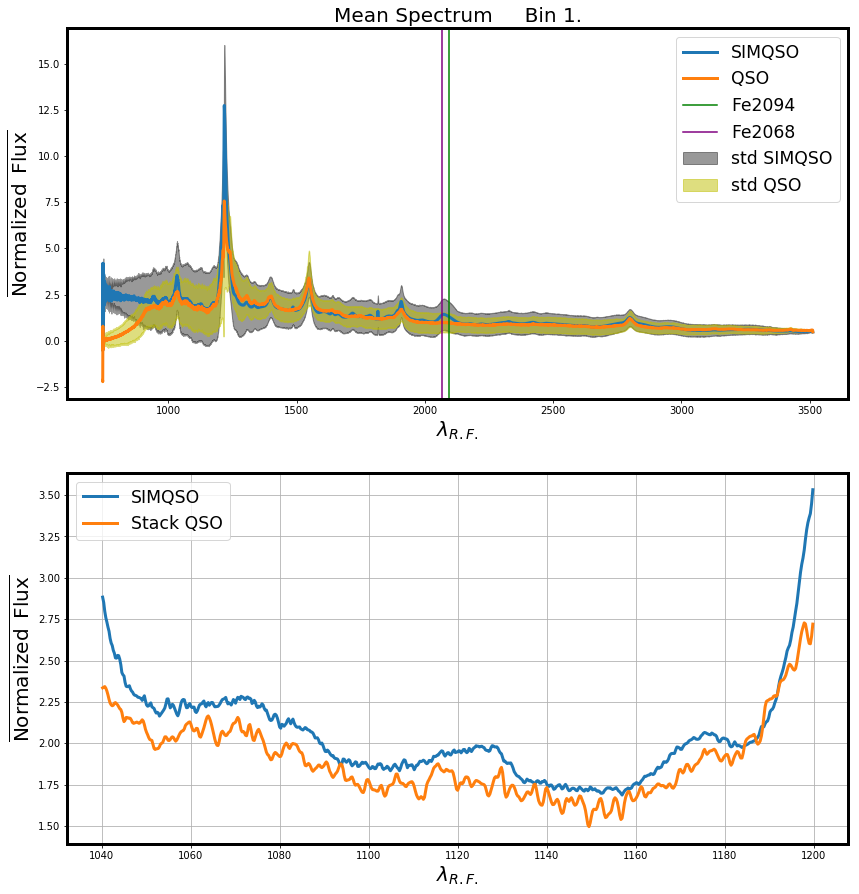

In [7]:
mean_spec(wavesimqso1,meansimqso1,waveqso1,meanqso1,stdsimqso1,stdqso1,1,1040,1200)

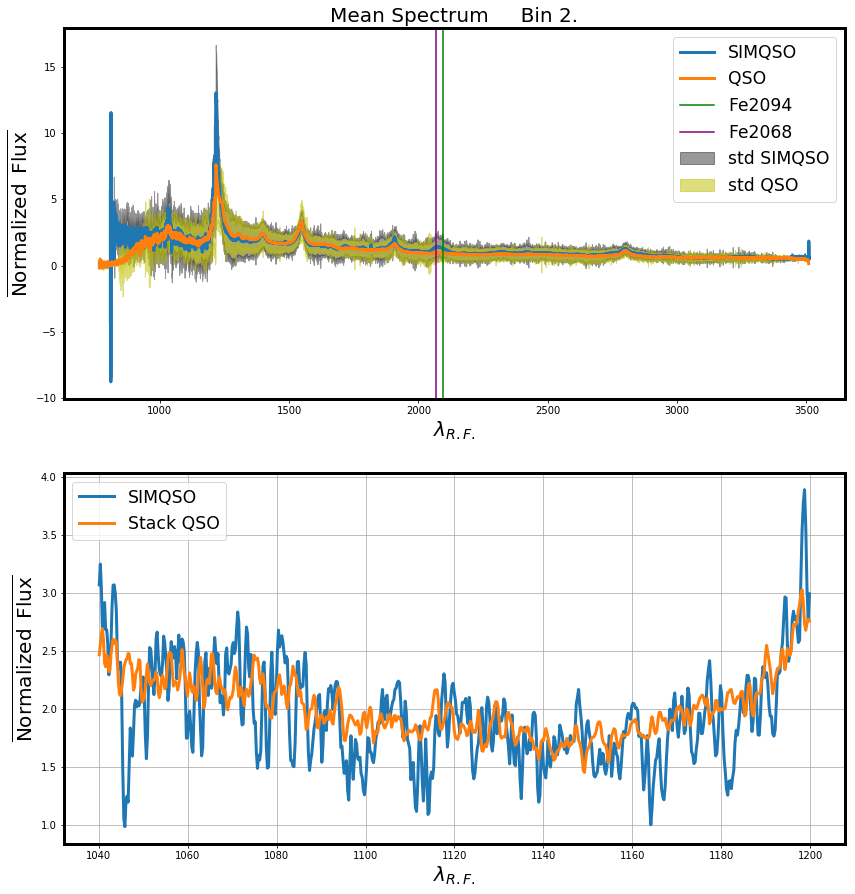

In [8]:
mean_spec(wavesimqso2,meansimqso2,waveqso2,meanqso2,stdsimqso2,stdqso2,2,1040,1200)

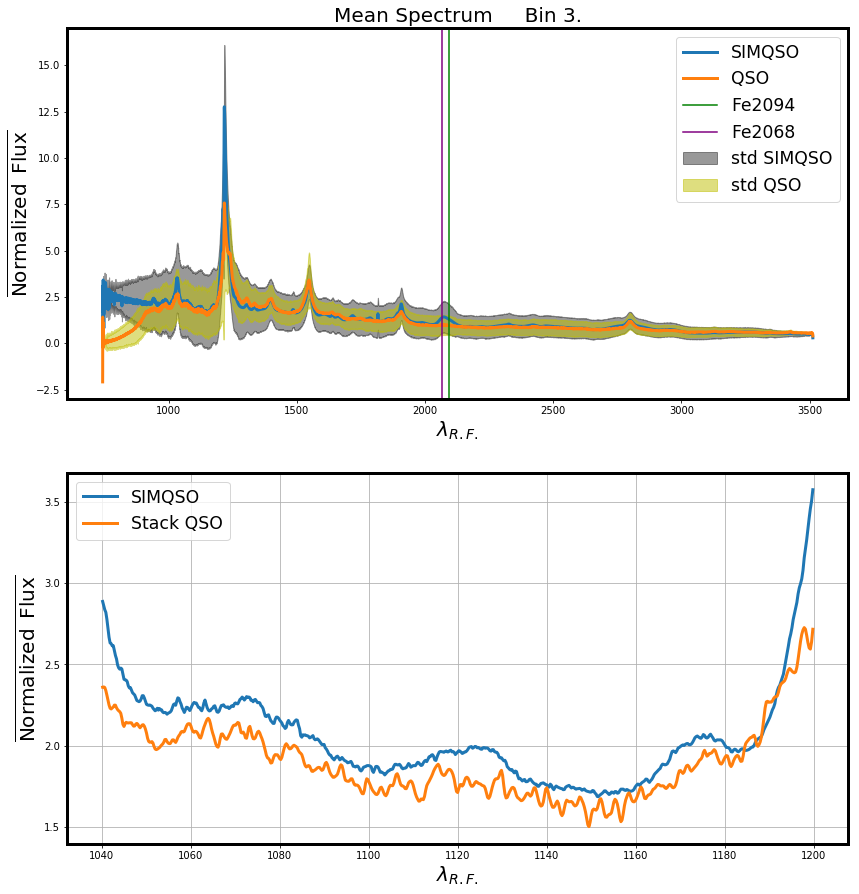

In [9]:
mean_spec(wavesimqso3,meansimqso3,waveqso3,meanqso3,stdsimqso3,stdqso3,3,1040,1200)

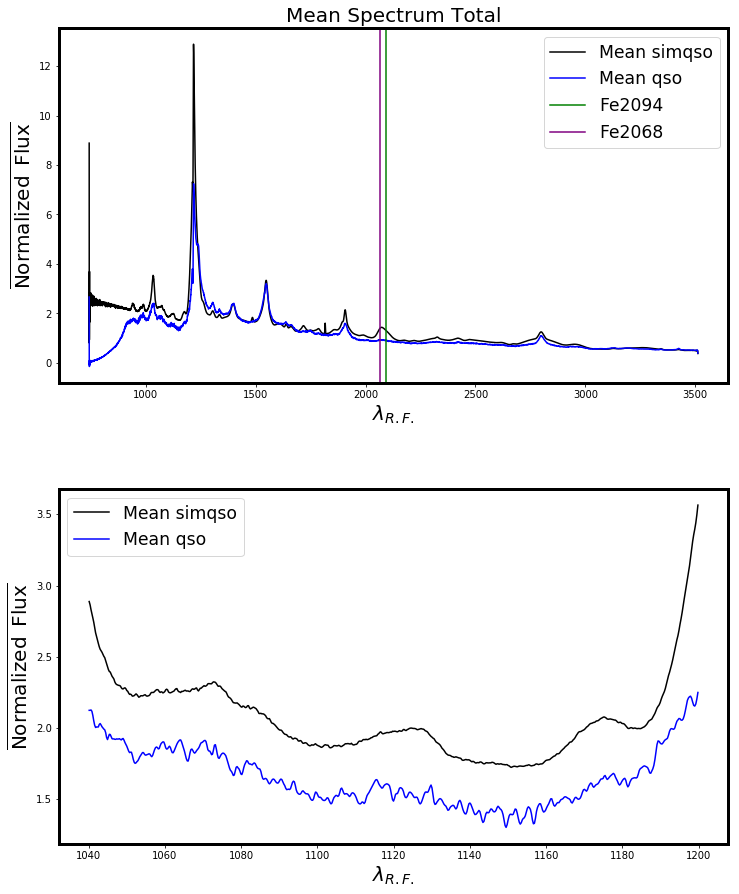

In [10]:
fac = 53.0/380.0
plt.figure(figsize=(12,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(2,1,1)
plt.title('Mean Spectrum Total',fontsize = 20)
plt.plot(simqsoT[1]['wavelength'].read(),simqsoT[1]['mean_spectrum'].read(), color = 'k', label='Mean simqso')
#plt.fill_between(simqsoT[1]['wavelength'].read(),simqsoT[1]['mean_spectrum'].read()+simqsoT[1]['std_spectrum'].read(),simqsoT[1]['mean_spectrum'].read()-simqsoT[1]['std_spectrum'].read(), label='std simqso', color = 'r', alpha=0.7)
plt.plot(qsoT[1]['wavelength'].read(),fac*qsoT[1]['mean_spectrum'].read(), color = 'b', label='Mean qso')
#plt.fill_between(qsoT[1]['wavelength'].read(),qsoT[1]['mean_spectrum'].read()+fac*qsoT[1]['std_spectrum'].read(),fac*qsoT[1]['mean_spectrum'].read()-qsoT[1]['std_spectrum'].read(), label='std qso', color = 'y', alpha=0.7)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
axvline(2094, color = 'g', label = 'Fe2094')
axvline(2068, color = 'purple', label = 'Fe2068')
plt.legend(fontsize='xx-large')
#plt.savefig('SimqsoVsQSO_T.png')
plt.subplot(2,1,2)
maskT = (simqsoT[1]['wavelength'].read() > 1040) & (simqsoT[1]['wavelength'].read() < 1200)
plt.plot(simqsoT[1]['wavelength'].read()[maskT],simqsoT[1]['mean_spectrum'].read()[maskT], color = 'k', label='Mean simqso')
#plt.fill_between(simqsoT[1]['wavelength'].read(),simqsoT[1]['mean_spectrum'].read()+simqsoT[1]['std_spectrum'].read(),simqsoT[1]['mean_spectrum'].read()-simqsoT[1]['std_spectrum'].read(), label='std simqso', color = 'r', alpha=0.7)
plt.plot(qsoT[1]['wavelength'].read()[maskT],fac*qsoT[1]['mean_spectrum'].read()[maskT], color = 'b', label='Mean qso')
#plt.fill_between(qsoT[1]['wavelength'].read(),qsoT[1]['mean_spectrum'].read()+qsoT[1]['std_spectrum'].read(),qsoT[1]['mean_spectrum'].read()-qsoT[1]['std_spectrum'].read(), label='std qso', color = 'y', alpha=0.7)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')

One can look how in all bins the QSO mean spectrum is more noisy than SIMQSO mean spectrum, except for the bin 2, where SIMQSO is more noisy than QSO, but in the complete sample one can look that the QSO sample is more noisy than SIMQSO as well as in PICCA. Let's look how the mean spectrum of QSO fall down in the blue side from the Ly-$\alpha$ emission line, It is because in QSO template the Lyman Limit (LL) is computed using the [Mean Free Path](https://www.roe.ac.uk/~aam/ecca/Publications/pub_files/MNRAS-2014-Worseck-1745-60.pdf) while in SIMQSO the LL is not computed. Here one can look a prominent emission line around 2075 $\overset{\circ}{A}$, but I think this apparent emission line is actually due to r-band noise and when I removed the color-cut these information stays.

### PCA analysis for bin 1

In orden to investigate the noise in the mean spectrum of QSO template, let's make the princial comonents analysis, it will help to understand if the noise is due to the forest (absorption lines) and exposure time or if the noise is due to the continuum spectra template from QSO (the continuum of each spectra is computed using 4 eigenvectors of PCA from SDSS [z$\leq 2.1$] and BOSS [z$\geq$2.1]).

Let's get the first four eigenvector for reconstruct the continuum spectra.
\begin{equation} 
      y(\lambda) = \mu(\lambda) + \sum_{k=1}^{4}c_{k}\phi_{k}(\lambda),
\end{equation}
where $\mu$ is the mean spectrum, $c_{k}$ the coefficients and $\phi_{k}$ are the eigenvectors.

Let's take a look at the continuum fitting from PCA in the spectra.

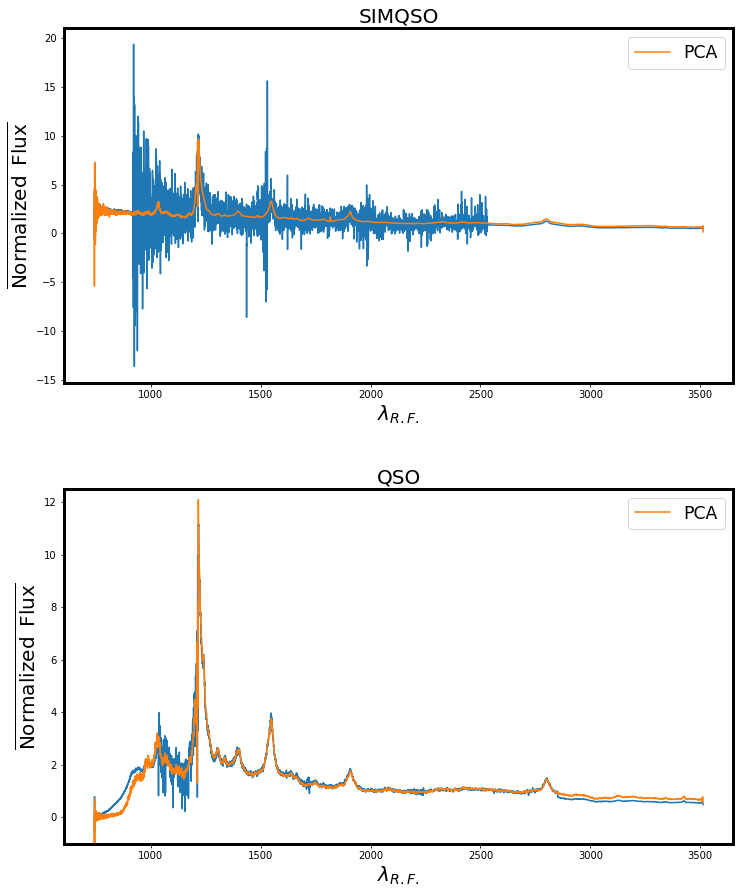

In [18]:
plt.figure(figsize=(12,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(2,1,1)
plt.title('SIMQSO',fontsize = 20)
plt,plot(simqso1[1]['wavelength'].read(),simqso1[2]['flux_spectra'].read()[1]+simqso1[1]['mean_spectrum'].read())
plt,plot(simqso1[1]['wavelength'].read(),simqsopca[1]['continuum'].read()[1]+simqso1[1]['mean_spectrum'].read(),label='PCA')
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')
#plt.savefig('SimqsoVsQSO_T.png')
plt.subplot(2,1,2)
plt.title('QSO',fontsize = 20)
plt,plot(qso1[1]['wavelength'].read(),qso1[2]['flux_spectra'].read()[1]+qso1[1]['mean_spectrum'].read())
plt,plot(qso1[1]['wavelength'].read(),qsopca[1]['continuum'].read()[1]+qso1[1]['mean_spectrum'].read(),label='PCA')
plt.ylim(-1,12.5)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')

In [12]:
def empca_mean_cont_std(meanspec, weight,coeff,eigvec,n_vec=4):
    ### Choose the first four eigenvectors
    conti_mock = []
    for i in range(len(coeff)):
        spectram = []
        for j in range(n_vec):
            spectram.append(coeff[i][j]*eigvec[j])
        spectrasm = np.vstack(spectram)
        specm = np.sum(spectrasm,axis = 0)
        conti_mock += [specm]
    continuum_mock = np.vstack(conti_mock)
    ### The continuum is y(lambda)
    for i in range(len(continuum_mock)):
        continuum_mock[i] +=  meanspec                          # continuum = continuum + mean spec.
    ### Stack
    meancont = sp.average(continuum_mock, weights = weight,axis=0) # mean continuum.
    ### Get standard deviation
    for i in range(len(continuum_mock)):        
        continuum_mock[i] -= meancont                           # Now, the continuum = continuum - mean_cont. 
    
    vari = np.zeros(len(meancont))   
    for h in range(len(continuum_mock)):
        vari += continuum_mock[h]**2
    varianza = np.sqrt(vari/(len(continuum_mock)-1))            # standard deviation.
    # std_stack_mock = np.std(contin_mock,axis=0)               #It's only 
    ### Normalization for the eigenvalues.
    coefficient = np.zeros((n_vec,len(coeff)))
    for k in range(4):
        coefficient[k] = coeff[:,k]
    return meancont, varianza, coefficient

In [20]:
meancontsimqso, stdsimqso, coeffsimqsoT = empca_mean_cont_std(meansimqso1,weightsimqso,coeffsimqso,vecsimqso)

In [21]:
meancontqso, stdqso, coeffqsoT = empca_mean_cont_std(meanqso1,weightqso,coeffqso,vecqso)

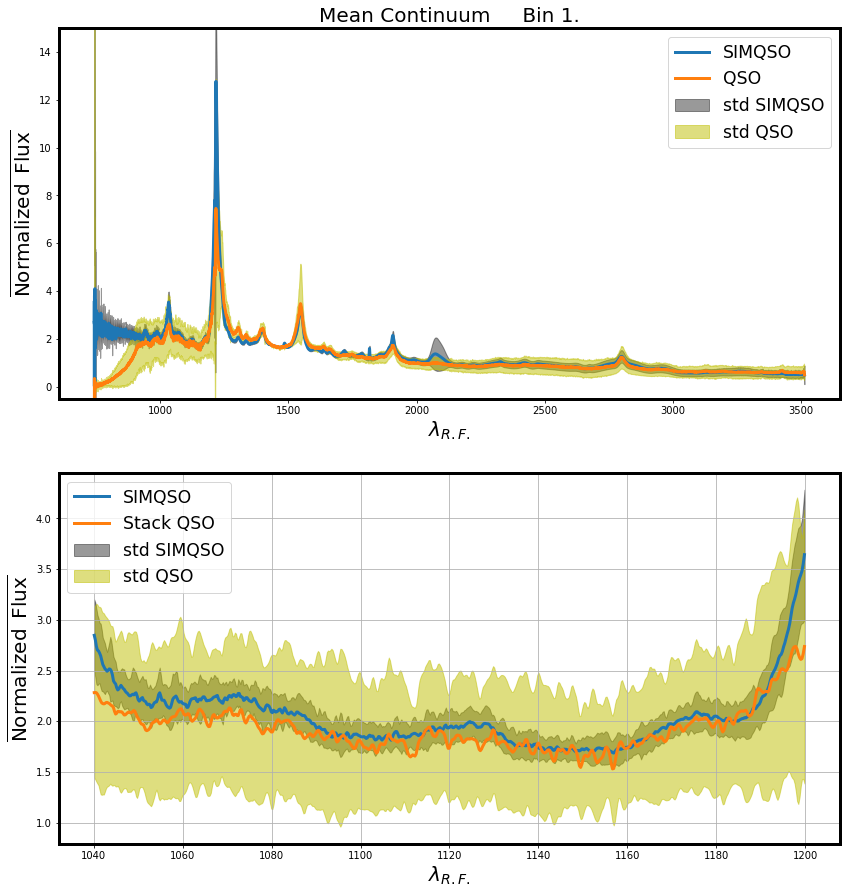

In [30]:
mean_spec(wavesimqso1, meancontsimqso,waveqso1, meancontqso, stdsimqso, stdqso, 1, 1040, 1200)

One can look that the standard deviation of QSO is larger than SIMQSO, the opposite case occurs when only the mean spectrum is obtained.

In [31]:
def eigvec_plot(mmwave,mmeigvec,ddwave,ddeigvec):
    plt.figure(figsize=(14,30))
    for i in range(4):
        plt.subplot(4,1,i+1)
        plt.title('Principal Component {}'.format(i+1),fontsize=20)
        plt.plot(mmwave,mmeigvec[i],label='SIMQSO')
        plt.plot(ddwave,ddeigvec[i],label='QSO')
        #plt.xlim(xxmin,xxmax)
        #plt.ylim(-2,10)
        plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
        plt.ylabel('Flux', fontsize = 20)
        #plt.ylabel('$\mathrm{\overline{Flux}}$', fontsize = 20)
        plt.legend(fontsize='xx-large')
        plt.grid()

Now, let's compare the principal components.

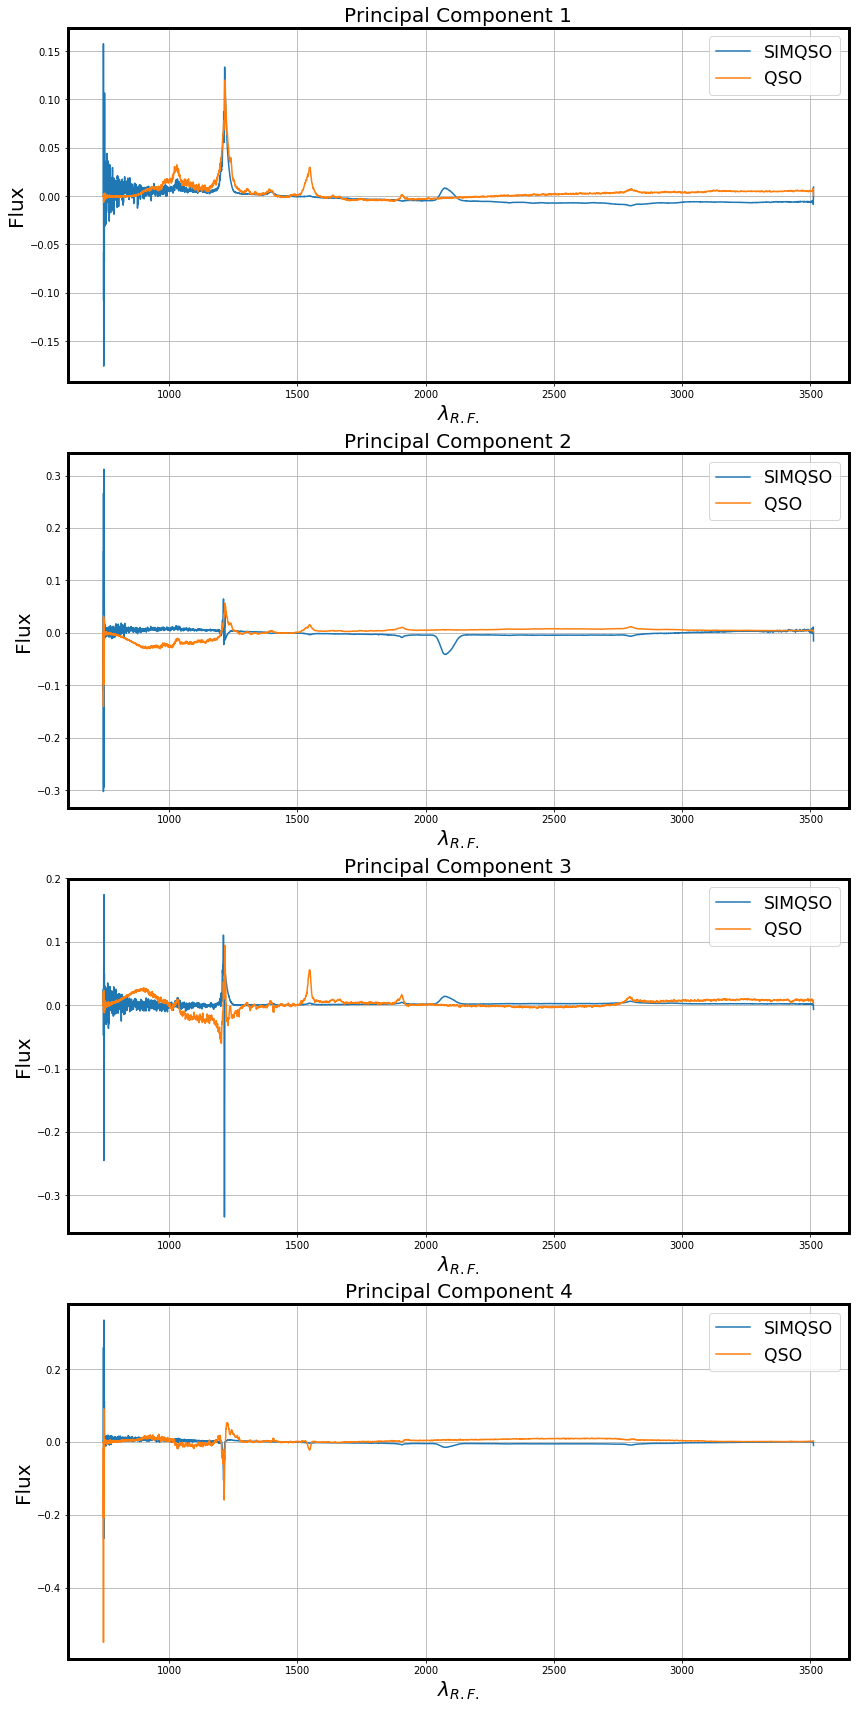

In [32]:
eigvec_plot(wavesimqso1, vecsimqso, waveqso1, vecqso)

In both case one can look the Ly-$\alpha$ emission line, but in SIMQSO is the prominent "emission line" around 2075 and it can biased the result of PCA. While in QSO one can look the Ly-$\beta$, CIV and MgII emission lines. In the region of Ly-$\alpha$ forest QSO look like noisy than SIMQSO, but I think that to be sure of this, one should make PCA only in that region. 

In the case of SIMQSO the first 4 eigenvectors have $2.5\%$ of the variance, while QSO have $27.5\%$. 

In [33]:
def coeff_hist(mcoeff,dcoeff,cmin,cmax,sizebin):
    from scipy.stats import norm
    import matplotlib.mlab as mlab
    plt.figure(figsize=(25,13))
    for i in range(len(mcoeff)):
        plt.subplot(2,2,i+1)
        plt.subplots_adjust(hspace=0.3, wspace=0.2)
        mweights11=np.ones_like(mcoeff[i])/len(mcoeff[i])
        dweights11=np.ones_like(dcoeff[i])/len(dcoeff[i])
        n = (cmax-cmin)/sizebin
        eig0bin = np.linspace(cmin,cmax, n+1)
        
        (simqsomu, simqsosigma) = norm.fit(mcoeff[i])
        ii, jj, kk = plt.hist(mcoeff[i],eig0bin,histtype='step',weights=mweights11,label='SIMQSO')
        sy = mlab.normpdf( jj, simqsomu, simqsosigma)
        sl = plt.plot(jj, sy, 'r--', linewidth=2, label='SIMQSO normfit')

        (qsomu, qsosigma) = norm.fit(dcoeff[i])
        ll, mm, nn = plt.hist(dcoeff[i],eig0bin,histtype='step',weights=dweights11,label='QSO')
        y = mlab.normpdf( mm, qsomu, qsosigma)
        l = plt.plot(mm, y, 'g--', linewidth=2, label='QSO normfit')

        ax = plt.gca()
        plt.text(0.1, 0.9, 'eigvec {}'.format(i+1),transform=ax.transAxes,fontsize = 15)
        plt.xlabel('$c_{k}$', fontsize = 20)
        plt.ylabel('Frequency', fontsize = 20)
        plt.title(r'$s\mu=%.3f,\ s\sigma=%.3f \ | \ q\mu=%.3f,\ q\sigma=%.3f$' %(simqsomu, qsosigma,qsomu,qsosigma),fontsize=20)
        plt.legend(fontsize='xx-large')

Let's look the scatter of PCA coefficients. 

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


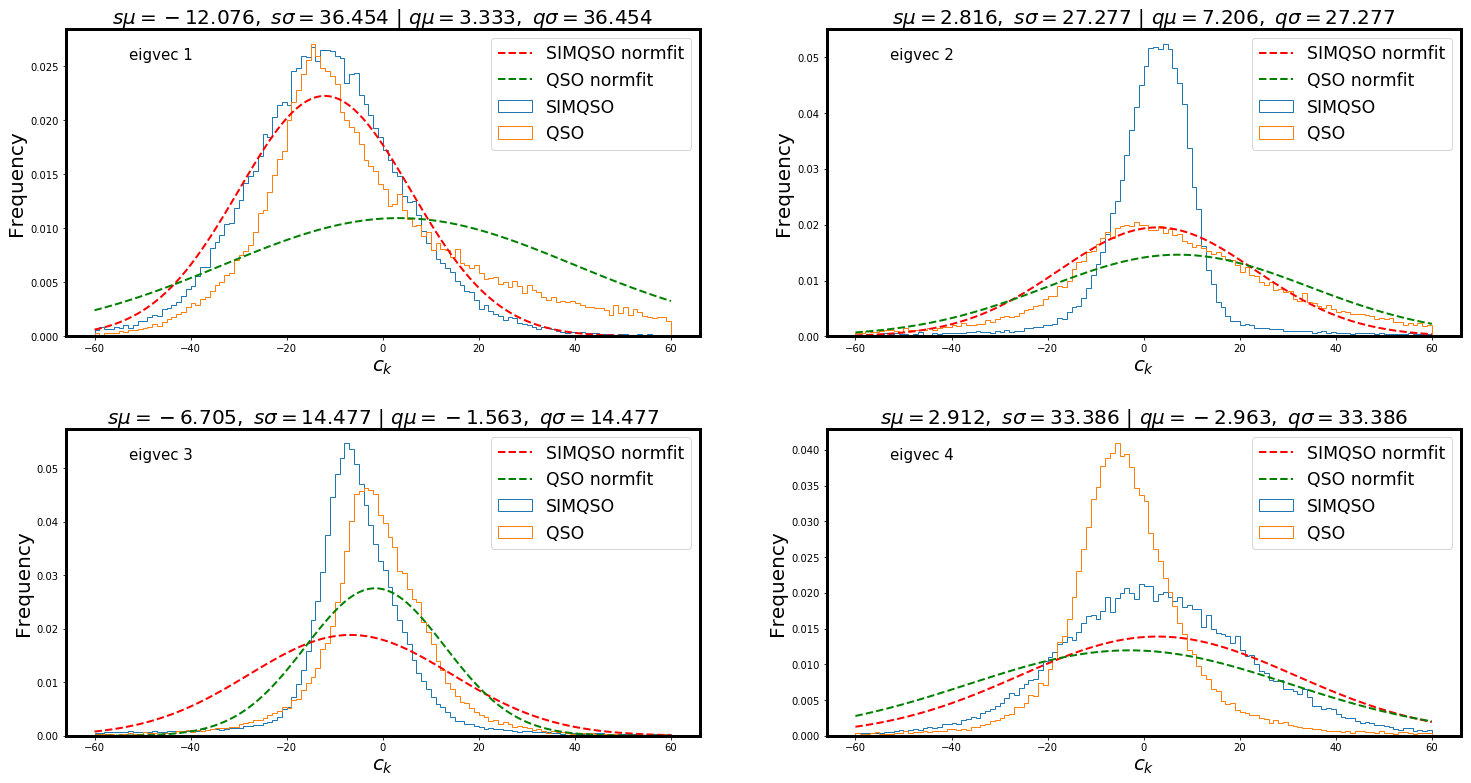

In [34]:
coeff_hist(coeffsimqsoT,coeffqsoT,-60,60,1)

I tried to fit a normal distribution, but look like it didn't work.

Since at the level of the continuum the QSO spectra stays noises. I think that the problem is the spectra continuum produced by QSO. If this is correct, then the mean spectrum of spectra without transmission and high exposure time should be noise.

So, I produce around 50000 spectra with "--no-transmission" and "exptime=1e8" so I get the continuum.

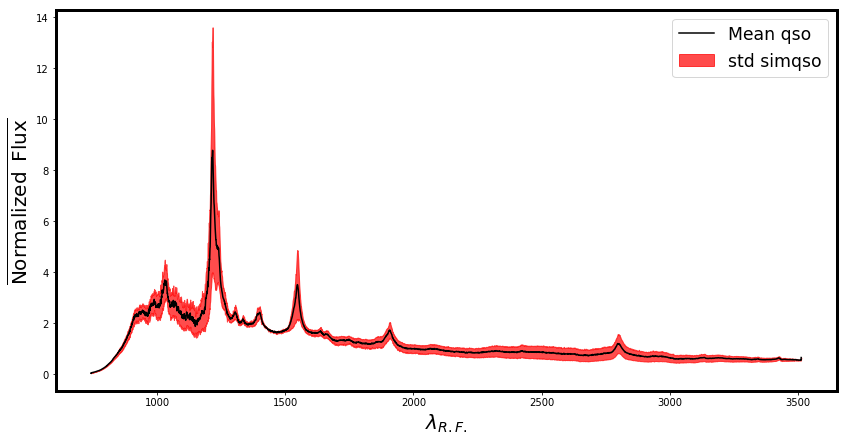

In [40]:
plt.figure(figsize=(14,7))
plt.plot(waveqsocont,meanqsocont, color = 'k', label='Mean qso')
plt.fill_between(waveqsocont,meanqsocont+stdqsocont,meanqsocont-stdqsocont, label='std simqso', color = 'r', alpha=0.7)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')

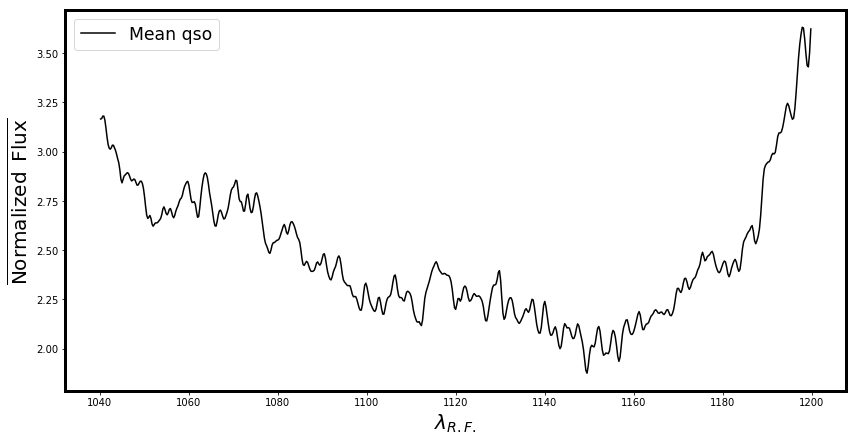

In [43]:
plt.figure(figsize=(14,7))
maskcont = (waveqsocont > 1040) & (waveqsocont < 1200)
plt.plot(waveqsocont[maskcont],meanqsocont[maskcont], color = 'k', label='Mean qso')
#plt.fill_between(waveqsocont[maskcont],meanqsocont[maskcont]+stdqsocont[maskcont],meanqsocont[maskcont]-stdqsocont[maskcont], label='std simqso', color = 'r', alpha=0.7)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized \enspace Flux}}$', fontsize = 20)
plt.legend(fontsize='xx-large')

### Eureka! the problem is here. It mean that the spectra continuum produced by the first 4 principal components have a lot information from the original spectra of SDSS and BOSS. 

If we want solve it, we need to make a new PCA (maybe using the BOSS DR14) and be sure that the amount information is enough to produce the continuum of the spectra, but without much information from forest. 